# Monocle 3 on Colab Test Drive

# <img src="http://reconstrue.com/assets/images/reconstrue_logo_brandmark.svg" width="42px" align="top" /> **Reconstrue**

This code is licensed by Reconstrue under the Apache 2.0 License.

This notebook simply tests to see if [Monocle 3](https://cole-trapnell-lab.github.io/monocle3/) can be deployed and exercised on Colab. It can, mostly. 

The one problem that needs to be solved is that there is a bit of UI that seems to be made for RStudio but which has not been made to work on Colab. Specifically, this relates to selecting a subset of a scatter plat; seemingly R interactive code has not been fully worked out on Colab. If we solve this one small-ish issue, then we can have an example Jupyter notebook which shows folks how to deploy Monocle 3 on Colab. The author of this notebook is not an experience R developer, ergo this cry for help.

Reconstrue is interested in Monocle 3 because it is:
- useful for neuroscientists, Reconstrue's main customer base
- licensed commerically friendly ([MIT](https://github.com/cole-trapnell-lab/monocle3/blob/master/LICENSE.md))
- code coming out of Seattle Lake Union area


## R on Colab
Monocle 3, "an analysis toolkit for single-cell RNA-seq," is written in R. Turns out Colab can run R notebooks, although this is not widely known because as of now (2019-11-20) R is not an officially supported language on Colab (and it show; more on that below).

On 2019-06-18 JFT found IRkernel's Demo.html via [stackoverflow: How to use R with Google Colaboratory?](https://stackoverflow.com/a/54595286). I.e starting from a demo page ([Demo.ipynb](https://github.com/IRkernel/IRkernel/blob/master/example-notebooks/Demo.ipynb)) of IRkernel which is [MIT licensed](https://github.com/IRkernel/IRkernel/blob/master/DESCRIPTION#L20) this page was built out on Colab. 

The core point is to start with Demo.ipynb because is has the JSON metadata to specify that the notebook is designed for an R kernel, and Colab will provide:
```
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "language_info": {
      "codemirror_mode": "r",
      "file_extension": ".r",
      "mimetype": "text/x-r-source",
      "name": "R",
      "pygments_lexer": "r",
      "version": "3.3.1"
    },
    "kernelspec": {
      "display_name": "R",
      "language": "R",
      "name": "ir"
    }
  }...
```

## Install Monocle 3

One of the nice features of Colab (Colab is essentially just Google hosting Jupyter notebooks for free) is that for Python the vast majority of any package one would use is pre-installed making for very quick initialization. Currently this is very much not the case for R as we will she shortly; the installs are slow and annoying, c'est la vie but another detail that makes R on Colab nowhere near as cool as Python on Colab. This is a real drag given the frequent disconnects-upon0idle, as well as the hard 12 hour limit imposed on Colab.

The Monocle folks did nice work making it easy to install Monocle, as documented in [Installing Monocle 3](https://cole-trapnell-lab.github.io/monocle3/docs/installation/). Nonetheless, on Colab the following rigmarole needs to happen before installing Monocle, otherwise various support libraries (e.g. units) will fail to install.

While hacking to get Monocle 3 running on Colab, various dependency libraries did not install without a fight. Again, while hacking it was discovered that [others have had similar issues](https://github.com/datacarpentry/r-raster-vector-geospatial/issues/138#issue-313014296) (which are R-on-Colab issues, not Monocle 3 issue) and the solution seems to be:
```
!apt-get -qq install -y libudunits2-dev libgdal-dev libgeos-dev libproj-dev 
```
But unfortuneately, IRkernel does not seem to handle !magics so `apt-get has to be evoked via an R system() call:

In [2]:
# https://mothergeo-py.readthedocs.io/en/latest/development/how-to/gdal-ubuntu-pkg.html#before-you-begin-python-3-6
system("apt-get install python3.6-dev")

# Need to add this repo, otherwise libgdal-dev will cause apt-get to return 100 b/c of a 404. See:
# https://mothergeo-py.readthedocs.io/en/latest/development/how-to/gdal-ubuntu-pkg.html#install-gdal-ogr
# https://github.com/datacarpentry/r-raster-vector-geospatial/issues/138#issue-313014296

system("add-apt-repository ppa:ubuntugis/ppa")
system("apt-get update -qq")
system("apt-get -qq -y install --fix-missing libudunits2-dev python-gdal gdal-bin libgdal-dev", intern=TRUE)
system("apt-get -y install --fix-missing libudunits2-dev python-gdal gdal-bin libgdal-dev", intern=TRUE)

[1] "(Reading database ... \r(Reading database ... 5%\r(Reading database ... 10%\r(Reading database ... 15%\r(Reading database ... 20%\r(Reading database ... 25%\r(Reading database ... 30%\r(Reading database ... 35%\r(Reading database ... 40%\r(Reading database ... 45%\r(Reading database ... 50%\r(Reading database ... 55%\r(Reading database ... 60%\r(Reading database ... 65%\r(Reading database ... 70%\r(Reading database ... 75%\r(Reading database ... 80%\r(Reading database ... 85%\r(Reading database ... 90%\r(Reading database ... 95%\r(Reading database ... 100%\r(Reading database ... 134923 files and directories currently installed.)\r"
  [2] "Preparing to unpack .../libzstd1_1.3.3+dfsg-2ubuntu1.1_amd64.deb ...\r"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
  [3] "Unpacking libzstd1:amd64 (1.3.3+dfsg-2ubuntu1.1) over (1.3.3+dfsg-2ubuntu1) ...\r"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
  [4] "Setting up libzstd1:amd64 (1.3.3+dfsg-2ubuntu1.1) ...\r"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
  [5] "(Reading database ... \r(Reading database ... 5%\r(Reading database ... 10%\r(Reading database ... 15%\r(Reading database ... 20%\r(Reading database ... 25%\r(Reading database ... 30%\r(Reading database ... 35%\r(Reading database ... 40%\r(Reading database ... 45%\r(Reading database ... 50%\r(Reading database ... 55%\r(Reading database ... 60%\r(Reading database ... 65%\r(Reading database ... 70%\r(Reading database ... 75%\r(Reading database ... 80%\r(Reading database ... 85%\r(Reading database ... 90%\r(Reading database ... 95%\r(Reading database ... 100%\r(Reading database ... 134923 files and directories currently installed.)\r"
  [6] "Preparing to unpack .../00-libmysqlclient20_5.7.28-0ubuntu0.18.04.4_amd64.deb ...\r"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [7] "Unpacking libmysqlclient20:amd64 (5.7.28-0ubuntu0.18.04.4) over (5.7.27-0ubuntu0.18.04.1) ...\r"                 

[1] "Reading package lists..."                                                       
 [2] "Building dependency tree..."                                                    
 [3] "Reading state information..."                                                   
 [4] "libudunits2-dev is already the newest version (2.2.26-1)."                      
 [5] "gdal-bin is already the newest version (2.4.0+dfsg-1~bionic0)."                 
 [6] "libgdal-dev is already the newest version (2.4.0+dfsg-1~bionic0)."              
 [7] "python-gdal is already the newest version (2.4.0+dfsg-1~bionic0)."              
 [8] "The following packages were automatically installed and are no longer required:"
 [9] "  libgeos-3.6.2 libproj12"                                                      
[10] "Use 'apt autoremove' to remove them."                                           
[11] "0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded."

The stock Monocle 3 install instructions begin with installing Bioconductor.

In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
# BiocManager::valid()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'BiocVersion'
Old packages: 'DT', 'knitr', 'R6', 'rmarkdown', 'roxygen2', 'rprojroot',
  'scales', 'selectr', 'xfun', 'xtable'


The second step in the stock install instructions is to actually install Monocle 3. For whatever reason, Bioconductor needs to be explicitly told to install 8 packages that are needed.

This install is long and has no progress indicator.

In [4]:
# Test one at a time to find the problem

# [X]: "Boibase"
# [X]: "DelayedArray"
# [X]: "DelayedMatrixStats"
# [X]: "limma"
# [X]: "S4Vectors"
# [ ]: "SingleCellExperiment"
# [ ]: "SummarizedExperiment"))

options(install.packages.check.source = "yes")
# Problem child: BiocManager::install(c("SingleCellExperiment"))
BiocManager::install(c("GenomicRanges"))

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'GenomicRanges'
also installing the dependencies ‘bitops’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘XVector’

Old packages: 'DT', 'knitr', 'R6', 'rmarkdown', 'roxygen2', 'rprojroot',
  'scales', 'selectr', 'xfun', 'xtable'


In [6]:
# Issue, devtools::install_github('cole-trapnell-lab/monocle3') will report:
#   Skipping 8 packages not available: Biobase, BiocGenerics, DelayedArray, DelayedMatrixStats, limma, S4Vectors, SingleCellExperiment, SummarizedExperiment
# So, explicitly installing these seemed to help:

BiocManager::install(c("Biobase", "DelayedArray", "DelayedMatrixStats", "limma", "S4Vectors", "SingleCellExperiment", "SummarizedExperiment"))

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'Biobase', 'DelayedArray', 'DelayedMatrixStats', 'limma',
  'S4Vectors', 'SingleCellExperiment', 'SummarizedExperiment'
also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘rhdf5’, ‘Rhdf5lib’, ‘matrixStats’, ‘BiocParallel’, ‘HDF5Array’

Old packages: 'DT', 'knitr', 'R6', 'rmarkdown', 'roxygen2', 'rprojroot',
  'scales', 'selectr', 'xfun', 'xtable'


In [0]:
# Issue, devtools::install_github('cole-trapnell-lab/monocle3') will report:
#   Skipping 8 packages not available: Biobase, BiocGenerics, DelayedArray, DelayedMatrixStats, limma, S4Vectors, SingleCellExperiment, SummarizedExperiment
# So, explicitly installing these seemed to help:

# TODO: these are slow, so check (somehow) if these are already installed.
# TODO: kill this off, combined individual installs into one 
#BiocManager::install("Biobase")
#BiocManager::install("DelayedArray")
#BiocManager::install("DelayedMatrixStats")
#BiocManager::install("limma")
#BiocManager::install("S4Vectors")
#BiocManager::install("SingleCellExperiment")
#BiocManager::install("SummarizedExperiment")
#BiocManager::install("batchelor")


In [8]:
# TODO: note this is repeated later. This is here just for isolated testing.
BiocManager::install("batchelor")

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'batchelor'
also installing the dependencies ‘beeswarm’, ‘vipor’, ‘gridExtra’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘irlba’, ‘rsvd’, ‘ggbeeswarm’, ‘viridis’, ‘BiocNeighbors’, ‘BiocSingular’, ‘scater’, ‘beachmat’

Old packages: 'DT', 'knitr', 'R6', 'rmarkdown', 'roxygen2', 'rprojroot',
  'scales', 'selectr', 'xfun', 'xtable'


Back to stock install step 2:

In [9]:
devtools::install_github('cole-trapnell-lab/monocle3')


leidenbase   (NA    -> c22a7d01f...) [GitHub]
ggrepel      (NA    -> 0.8.1       ) [CRAN]
grr          (NA    -> 0.9.5       ) [CRAN]
igraph       (NA    -> 1.2.4.1     ) [CRAN]
lmtest       (NA    -> 0.9-37      ) [CRAN]
Matrix.utils (NA    -> 0.9.7       ) [CRAN]
pbapply      (NA    -> 1.4-2       ) [CRAN]
pbmcapply    (NA    -> 1.5.0       ) [CRAN]
pheatmap     (NA    -> 1.0.12      ) [CRAN]
plotly       (NA    -> 4.9.1       ) [CRAN]
proxy        (NA    -> 0.4-23      ) [CRAN]
pscl         (NA    -> 1.5.2       ) [CRAN]
RANN         (NA    -> 2.6.1       ) [CRAN]
rsample      (NA    -> 0.0.5       ) [CRAN]
RhpcBLASctl  (NA    -> 0.18-205    ) [CRAN]
Rtsne        (NA    -> 0.15        ) [CRAN]
slam         (NA    -> 0.1-46      ) [CRAN]
spdep        (NA    -> 1.1-3       ) [CRAN]
speedglm     (NA    -> 0.3-2       ) [CRAN]
uwot         (NA    -> 0.1.4       ) [CRAN]
R6           (2.4.0 -> 2.4.1       ) [CRAN]
scales       (1.0.0 -> 1.1.0       ) [CRAN]
zoo          (NA    -> 1.8-6  

Skipping 9 packages not available: Biobase, SingleCellExperiment, batchelor, BiocGenerics, DelayedArray, DelayedMatrixStats, limma, S4Vectors, SummarizedExperiment


igraph (NA -> 1.2.4.1) [CRAN]


Installing 1 packages: igraph
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/Rtmpu4R4f4/remotes7f2aad607a/cole-trapnell-lab-leidenbase-c22a7d0/DESCRIPTION’
─  preparing ‘leidenbase’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories (556ms)
─  building ‘leidenbase_0.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing 50 packages: ggrepel, grr, igraph, lmtest, Matrix.utils, pbapply, pbmcapply, pheatmap, plotly, proxy, pscl, RANN, rsample, RhpcBLASctl, Rtsne, slam, spdep, speedglm, uwot, R6, scales, zoo, hexbin, data.table, furrr, xtable, sp, spData, sf, deldir, LearnBayes, coda, expm, gmodels, FNN, RSpectra, RcppParallel, RcppProgress, dqrng, farver, future, globals, listenv, classInt, units, e1071, gdata, gtools, RcppEigen, sitmo
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Skipping install of 'leidenbase' from a github remote, the SHA1 (c22a7d01) has not changed since last install.
  Use `force = TRUE` to force installation


✔  checking for file ‘/tmp/Rtmpu4R4f4/remotes7fbc1ffe7/cole-trapnell-lab-monocle3-9becd94/DESCRIPTION’
─  preparing ‘monocle3’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘monocle3_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [10]:
# The following is the recommended way to test an install of Monocle 3.
# It should dump out a bunch or config stats
library(monocle3)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with


And that's it. Their set up is simple, after tackling some annoyances. It is slow on Colab but c'est la vie. With more experience perhaps there is a way to streamline this (the author is not an experienced R developer).



## Exercise Monocle 3

Hannah Pliner, one of [the two devs of Monocle 3](https://github.com/cole-trapnell-lab/monocle3/graphs/contributors), gave presentations on Monocle 3 at [Brotman Baty Institute's Single Cell Symposium](https://brotmanbaty.org/event/single-cell-symposium/). Her [tutorial content](http://staff.washington.edu/hpliner/) is on-line, which includes some test data and [an R script for doing the basics with Monocle 3](http://staff.washington.edu/hpliner/scripts/20190603_tutorial_script.R). The data is from C. elegans data from [Cao & Packer et al. 2017](https://science.sciencemag.org/content/357/6352/661) as explained in [the Monocle 3 docs](https://cole-trapnell-lab.github.io/monocle3/monocle3_docs/#clustering-and-classifying-your-cells).

Here, Pliner's script is copied with minimal modification to get things going on Colab, including breaking it out into multiple code cells.

In [0]:
# Load up Pliner's test data
expression_matrix <- readRDS(url("http://staff.washington.edu/hpliner/data/cao_l2_expression.rds"))
cell_metadata <- readRDS(url("http://staff.washington.edu/hpliner/data/cao_l2_colData.rds"))
gene_annotation <- readRDS(url("http://staff.washington.edu/hpliner/data/cao_l2_rowData.rds"))

cds <- new_cell_data_set(expression_matrix,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_annotation)

In [12]:
# Test out the accessor functions:
colData(cds)

rowData(cds)

head(counts(cds))



DataFrame with 42035 rows and 5 columns
                           plate cao_cluster            cao_cell_type
                        <factor>    <factor>              <character>
cele-001-001.CATGACTCAA      001          20     Unclassified neurons
cele-001-001.AAGACGGCCA      001           6                 Germline
cele-001-001.GCCAACGCCA      001          13 Intestinal/rectal muscle
cele-001-001.ATAGGAGTAC      001          27        Vulval precursors
cele-001-001.CTCGTCTAGG      001           2             Coelomocytes
...                          ...         ...                      ...
cele-010-092.CGTATTGAGA      010          17                       NA
cele-010-092.AGGTCTATGG      010          27        Vulval precursors
cele-010-092.TGCGAAGATC      010           9         Body wall muscle
cele-010-092.GTATTAAGTT      010          26                Failed QC
cele-010-092.GAAGTCCGTC      010          16        GABAergic neurons
                                      cao_tissue  

DataFrame with 20271 rows and 1 column
               gene_short_name
                      <factor>
WBGene00000001           aap-1
WBGene00000002           aat-1
WBGene00000003           aat-2
WBGene00000004           aat-3
WBGene00000005           aat-4
...                        ...
WBGene00269389        C08F1.12
WBGene00269391        F54F2.14
WBGene00269392        F54F7.14
WBGene00269394        F59H6.15
WBGene00269421        R06F6.14

   [[ suppressing 34 column names ‘cele-001-001.CATGACTCAA’, ‘cele-001-001.AAGACGGCCA’, ‘cele-001-001.GCCAACGCCA’ ... ]]


6 x 42035 sparse Matrix of class "dgCMatrix"
                                                                              
WBGene00000001 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WBGene00000002 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WBGene00000003 . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2 . . .
WBGene00000004 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WBGene00000005 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WBGene00000006 . . . . . . 1 . . . . . . . . . . . . . . . . . 2 . . . . . . .
                         
WBGene00000001 . . ......
WBGene00000002 . . ......
WBGene00000003 . . ......
WBGene00000004 . . ......
WBGene00000005 . . ......
WBGene00000006 . . ......

 .....suppressing 42001 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

No preprocess_method specified, using preprocess_method = 'PCA'
No trajectory to plot. Has learn_graph() been called yet?
cluster not found in colData(cds), cells will not be colored
cluster_cells() has not been called yet, can't color cells by cluster


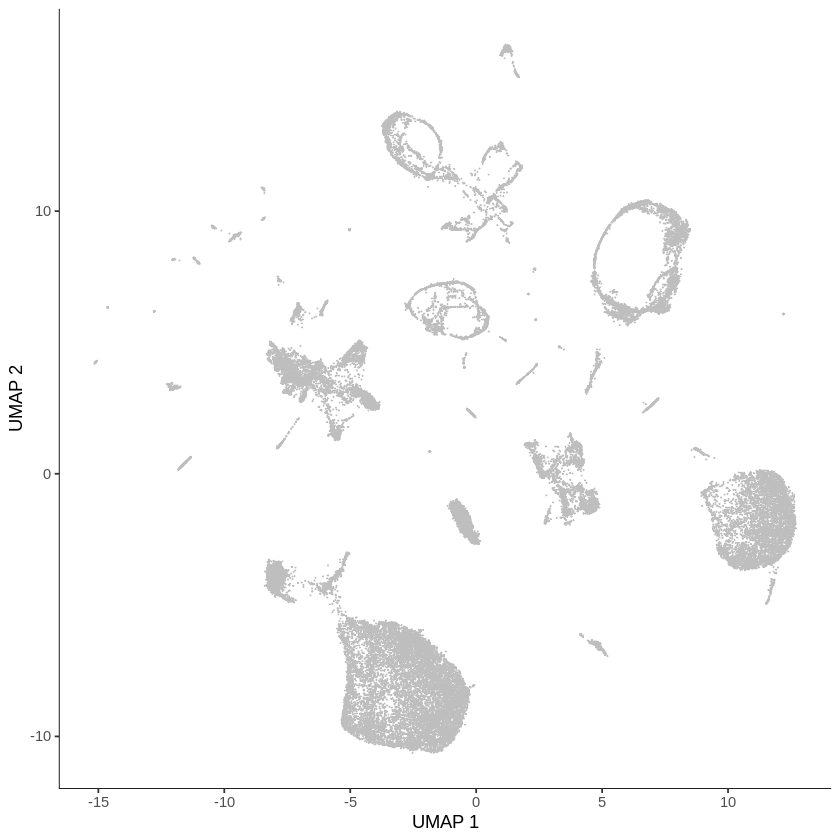

In [13]:
# Preprocess the cds - in default mode, this function normalizes the
# data and runs PCA
cds <- preprocess_cds(cds, num_dim = 100)

# Run UMAP to get a low dimension representation, and plot
cds <- reduce_dimension(cds)
plot_cells(cds)



cele-001-001.CATGACTCAA cele-001-001.AAGACGGCCA cele-001-001.GCCAACGCCA 
                      3                       2                      13 
cele-001-001.ATAGGAGTAC cele-001-001.CTCGTCTAGG cele-001-001.AAGTTGCCAT 
                      7                       8                       2 
37 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 37

cele-001-001.CATGACTCAA cele-001-001.AAGACGGCCA cele-001-001.GCCAACGCCA 
                     28                       2                      23 
cele-001-001.ATAGGAGTAC cele-001-001.CTCGTCTAGG cele-001-001.AAGTTGCCAT 
                     12                      13                       2 
51 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 51

No trajectory to plot. Has learn_graph() been called yet?
No trajectory to plot. Has learn_graph() been called yet?


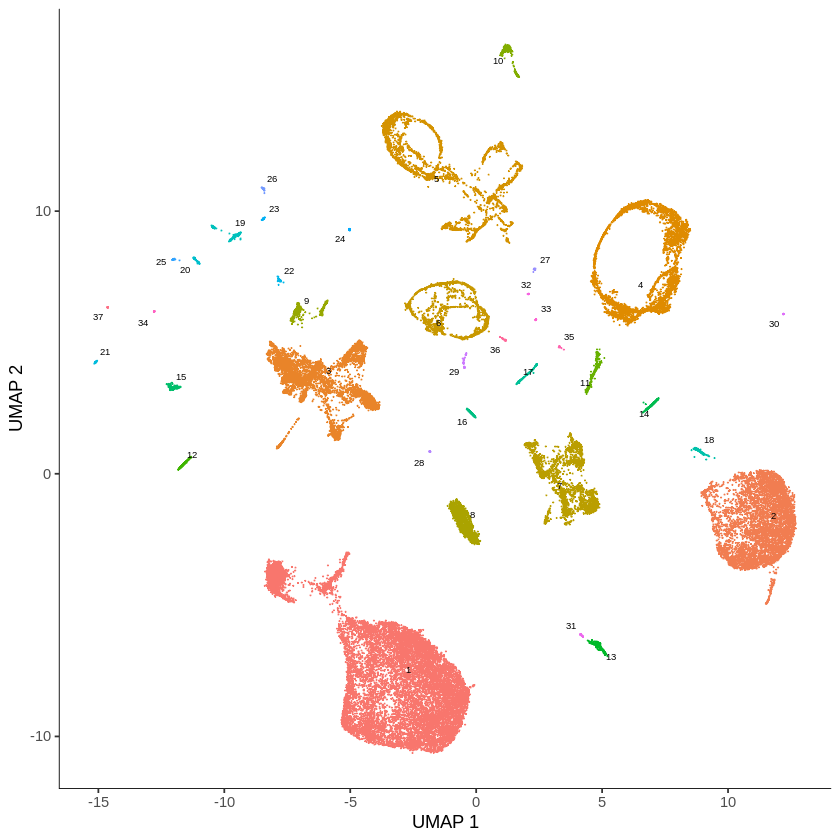

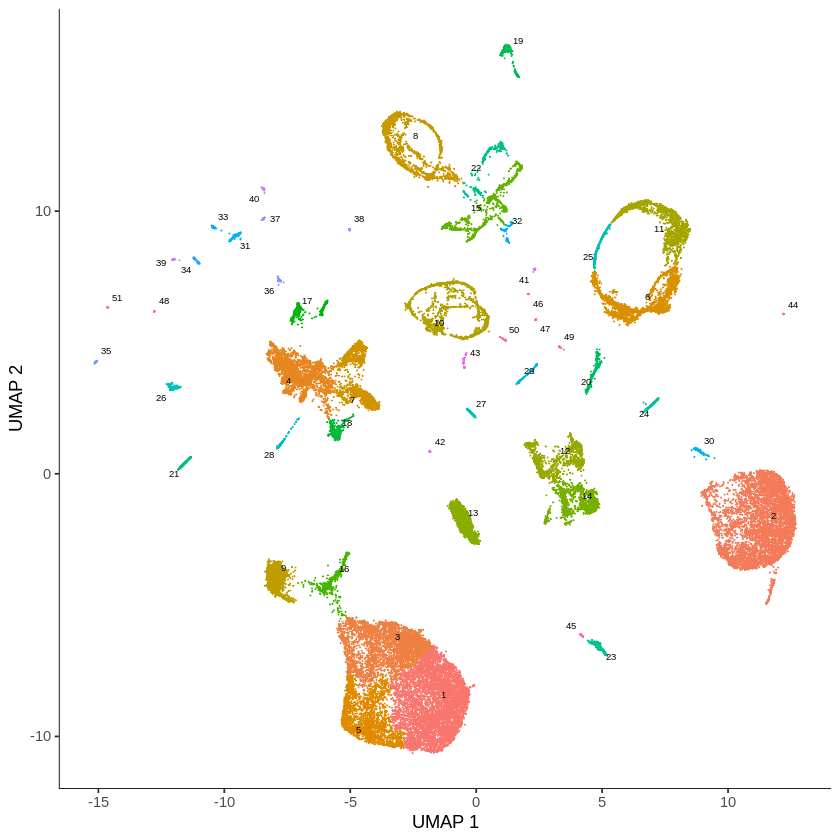

In [14]:
# Cluster cells and view the clusters and partitions (super-clusters)
cds <- cluster_cells(cds)
head(partitions(cds, reduction_method = "UMAP"))
head(clusters(cds, reduction_method = "UMAP"))

plot_cells(cds, color_cells_by="partition", group_cells_by="partition")
plot_cells(cds, color_cells_by="cluster", group_cells_by="cluster")



In [0]:
# Subset cells interactively

# Original code, which errors on Colab I guess that the script 
# was build for RStudio or such, not for Jupyter widgetery.
#   Error: choose_cells only works in interactive mode.
# cds_subset <- choose_cells(cds)

# This hack just bypassing the subsetting, making the rest of this notebook
# not so interesting, but we're just testing if the code runs on Colab, and it does.
cds_subset <- cds


In [16]:
# Compare genes across chosen clusters (first 100 genes for speed)
gene_fits <- fit_models(cds_subset[1:100,], model_formula_str = "~cluster")
fit_coefs <- coefficient_table(gene_fits)
head(fit_coefs)

# Find top marker genes for each cluster
marker_genes <- top_markers(cds[1:1000,], genes_to_test_per_group = 3)
head(marker_genes)

tops_sig <- subset(marker_genes, marker_test_q_value < .05)

plot_cells(cds_subset, genes=gene_cluster_df, show_trajectory_graph=F, color_by="cell.type")


generate_garnett_marker_file(marker_genes)


gene_short_name
1 aap-1          
2 aap-1          
3 aap-1          
4 aap-1          
5 aap-1          
6 aap-1          
  model                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

  |=======================================================| 100%, Elapsed 00:05
  |=======================================================| 100%, Elapsed 00:32


gene_id,gene_short_name,cell_group,marker_score,mean_expression,fraction_expressing,specificity,pseudo_R2,marker_test_p_value,marker_test_q_value
<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WBGene00000013,abf-2,29,0.09572409,0.3205299,0.1212121,0.7897237,0.08146916,3.953065e-51,2.016063e-46
WBGene00000017,abf-6,10,0.11828676,0.5817857,0.1509202,0.7837700,0.12590509,0.000000e+00,0.000000e+00
WBGene00000022,abt-4,43,0.16653774,0.5352591,0.2000000,0.8326887,0.12607622,5.626924e-21,2.869731e-16
WBGene00000031,abu-8,10,0.15797521,6.0594000,0.2736196,0.5773533,0.22601451,0.000000e+00,0.000000e+00
WBGene00000034,abu-11,43,0.14028024,1.7297988,0.2000000,0.7014012,0.10101915,4.085220e-17,2.083462e-12
WBGene00000035,ace-1,45,0.23527503,0.6352788,0.4500000,0.5228334,0.13947400,5.897745e-21,3.007850e-16


ERROR: ignored

## Next

OK stopping here, the goal was to see if Monocle 3 can be deployed on Colab. Mostly, yes.

Next step would seem to be 
- Solve the problem around `choose_cells()`
- Use Monocle on data from the wild, rather than prepackaged test data in *.rds files